# Proyek Analisis Data: AIR QUALITY DATASET
- **Nama:** M CAESAR ARIFAN P
- **Email:** pradadana.arifan20@gmail.com
- **ID Dicoding:** M CAESAR ARIFAN P

## Menentukan Pertanyaan Bisnis


- Pada jam berapa tingkat CO tertinggi dan terendah tercatat? Apa yang mungkin menjadi penyebabnya?
- Bagaimana perbandingan jumlah TEMP antara jam-jam yang berbeda? Apakah ada jam tertentu di mana peningkatan signifikan terjadi dibandingkan dengan jam lainnya?

## Import Semua Packages/Library

In [1]:
%%writefile analisis.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#memanggil semua library yang dibutuhkan untuk analisis data

## Data Wrangling

### Gathering Data

In [2]:
#menapilkan dataset yang kita miliki
data_air1 = pd.read_csv('/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
data_air1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [3]:
#menapilkan dataset yang kita miliki
data_air2 = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv')
data_air2.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [4]:
#menapilkan dataset yang kita miliki
data_air3 = pd.read_csv('/content/PRSA_Data_Tiantan_20130301-20170228.csv')
data_air3.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [5]:
new_order_df = pd.merge(
    left=data_air1,
    right=data_air2,
    how="inner",
    left_on="No",
    right_on="No"
)

#menggabungkan data dengan inner join berdasarkan kolom unik no yang ada pada setiap dataset

In [6]:
hasil = pd.DataFrame(new_order_df)
#menjadikan dataframe atas data yang telah digabung

In [7]:
new_order1 = pd.merge(
    left=hasil,
    right=data_air3,
    how="inner",
    left_on="No",
    right_on="No"
)
#menggabungkan data dengan inner join berdasarkan kolom unik no yang ada pada setiap dataset

In [8]:
hasil1 = pd.DataFrame(new_order1)
#menjadikan dataframe atas data yang telah digabung

In [9]:
hasil1.head()
#menampilkan 4 data pertama

,No,year_x,month_x,day_x,hour_x,PM2.5_x,PM10_x,SO2_x,NO2_x,CO_x,...,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,...,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,...,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,...,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,...,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,...,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Kita telah menampilkan 3 dataset yangakan kita analisis
- Kolom dari data yang kita dapatkan dari 3 dataset adalah sama

### Assessing Data

In [10]:
#mengecek nilai kosong atau null pada 3 dataset
data_air1.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


In [11]:
#mengecek nilai kosong atau null pada 3 dataset
data_air2.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


In [12]:
#mengecek nilai kosong atau null pada 3 dataset
data_air3.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


In [13]:
#mengecek data yang duplikat dari ke 3 dataset yang akan di analisis
data_air1.duplicated().sum()

0

In [14]:
#mengecek data yang duplikat dari ke 3 dataset yang akan di analisis
data_air2.duplicated().sum()

0

In [15]:
#mengecek data yang duplikat dari ke 3 dataset yang akan di analisis
data_air3.duplicated().sum()

0

In [16]:
hasil1.isnull().sum()
#menghitung data yang kosong pada data gabungna

,0
No,0
year_x,0
month_x,0
day_x,0
hour_x,0
PM2.5_x,628
PM10_x,440
SO2_x,446
NO2_x,692
CO_x,1206


In [17]:
hasil1.duplicated().sum()
#memnghitung data duplikat pada data gabungan

0

In [18]:
hasil1.isna().sum()
#menghitung data yang kotor pada data gabungan

,0
No,0
year_x,0
month_x,0
day_x,0
hour_x,0
PM2.5_x,628
PM10_x,440
SO2_x,446
NO2_x,692
CO_x,1206


In [19]:
hasil.info()
#melihat info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         35064 non-null  int64  
 1   year_x     35064 non-null  int64  
 2   month_x    35064 non-null  int64  
 3   day_x      35064 non-null  int64  
 4   hour_x     35064 non-null  int64  
 5   PM2.5_x    34436 non-null  float64
 6   PM10_x     34624 non-null  float64
 7   SO2_x      34618 non-null  float64
 8   NO2_x      34372 non-null  float64
 9   CO_x       33858 non-null  float64
 10  O3_x       34558 non-null  float64
 11  TEMP_x     35044 non-null  float64
 12  PRES_x     35044 non-null  float64
 13  DEWP_x     35044 non-null  float64
 14  RAIN_x     35044 non-null  float64
 15  wd_x       34986 non-null  object 
 16  WSPM_x     35050 non-null  float64
 17  station_x  35064 non-null  object 
 18  year_y     35064 non-null  int64  
 19  month_y    35064 non-null  int64  
 20  day_y 

In [20]:
kolom_tertentu = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']  # contoh kolom yang diinginkan
numerik_data = data_air1[kolom_tertentu]

# Langkah Hitung Q1 dan Q3 untuk setiap kolom numerik
Q1 = numerik_data.quantile(0.25)
Q3 = numerik_data.quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = numerik_data[(numerik_data < lower_bound) | (numerik_data > upper_bound)]

# Gabungkan dengan data asli untuk melihat outliers dalam konteks
outliers_with_context = data_air1[outliers.notna().any(axis=1)]

print("Outliers berdasarkan IQR:")
print(outliers_with_context)

Outliers berdasarkan IQR:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
44        45  2013      3    2    20   65.0   82.0  54.0   98.0  1399.0  13.0   
45        46  2013      3    2    21   69.0   90.0  68.0  116.0  2200.0   6.0   
46        47  2013      3    2    22   83.0  109.0  73.0  118.0  2200.0   6.0   
47        48  2013      3    2    23   92.0  114.0  78.0  108.0  2899.0   7.0   
48        49  2013      3    3     0  122.0  142.0  86.0  106.0  3100.0   8.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
34893  34894  2017      2   21    21   78.0   78.0   4.0   52.0  1200.0   7.0   
34894  34895  2017      2   21    22   52.0   52.0   4.0   32.0   900.0  27.0   
34895  34896  2017      2   21    23   53.0   53.0   5.0   26.0   100.0  31.0   
35021  35022  2017      2   27     5  124.0  175.0  21.0   92.0  3400.0   6.0   
35028  35029  2017      2   27    12  126.0  697.0  41.0   95.0  2400.0  23.0   

 

In [21]:
kolom_tertentu = ['hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']  # contoh kolom yang diinginkan
numerik_data = data_air2[kolom_tertentu]

# Langkah  Hitung Q1 dan Q3 untuk setiap kolom numerik
Q1 = numerik_data.quantile(0.25)
Q3 = numerik_data.quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = numerik_data[(numerik_data < lower_bound) | (numerik_data > upper_bound)]

# Gabungkan dengan data asli untuk melihat outliers dalam konteks
outliers_with_context = data_air2[outliers.notna().any(axis=1)]

print("Outliers berdasarkan IQR:")
print(outliers_with_context)

Outliers berdasarkan IQR:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
0          1  2013      3    1     0    3.0    6.0   3.0    8.0   300.0  44.0   
1          2  2013      3    1     1   12.0   12.0   3.0    7.0   300.0  47.0   
2          3  2013      3    1     2   14.0   14.0   NaN    7.0   200.0  22.0   
3          4  2013      3    1     3   12.0   12.0   3.0    5.0     NaN   NaN   
4          5  2013      3    1     4   12.0   12.0   3.0    NaN   200.0  11.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
34980  34981  2017      2   25    12   10.0   12.0   5.0   14.0   400.0  85.0   
35027  35028  2017      2   27    11   91.0  118.0  44.0   76.0  1800.0  32.0   
35036  35037  2017      2   27    20   58.0   84.0  18.0  130.0  1200.0  11.0   
35053  35054  2017      2   28    13    8.0    8.0   2.0    6.0   200.0  97.0   
35054  35055  2017      2   28    14    6.0   14.0   2.0    7.0   200.0  96.0   

 

In [22]:
kolom_tertentu = ['hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']  # contoh kolom yang diinginkan
numerik_data = data_air3[kolom_tertentu]

# Langkah Hitung Q1 dan Q3 untuk setiap kolom numerik
Q1 = numerik_data.quantile(0.25)
Q3 = numerik_data.quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = numerik_data[(numerik_data < lower_bound) | (numerik_data > upper_bound)]

# Gabungkan dengan data asli untuk melihat outliers dalam konteks
outliers_with_context = data_air3[outliers.notna().any(axis=1)]

print("Outliers berdasarkan IQR:")
print(outliers_with_context)

Outliers berdasarkan IQR:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
39        40  2013      3    2    15   35.0   38.0  48.0   45.0  1200.0  48.0   
40        41  2013      3    2    16   48.0   58.0  52.0   49.0  1100.0  43.0   
41        42  2013      3    2    17   56.0   64.0  49.0   46.0  1000.0  47.0   
42        43  2013      3    2    18   49.0   52.0  52.0   51.0  1100.0  39.0   
43        44  2013      3    2    19   64.0   70.0  43.0   55.0  1100.0  26.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
34893  34894  2017      2   21    21   48.0   48.0   2.0   41.0   100.0  38.0   
34894  34895  2017      2   21    22   52.0   52.0   2.0   46.0  1100.0  29.0   
34895  34896  2017      2   21    23   58.0   58.0   3.0   45.0  1100.0  30.0   
35028  35029  2017      2   27    12  109.0  156.0  39.0  113.0  2200.0  24.0   
35029  35030  2017      2   27    13  118.0  164.0  44.0  121.0  2100.0  33.0   

 

**Insight:**
- pada dataset air ke 3 kita mendapatkan 11 kolom yang memiliki data yang kosong
- pada dataset air ke 2 kita mendapatkan 12 kolom yang memiliki data yang kosong
- untuk dataset air ke 1 tidak memiliki data yang kosong
- jadi kita hanya perlu membersihkan dataset ke 2 dan ke 3
- pada dataset air ke 1 kita mendapatkan 8 data yang duplikat
- pada dataset air ke 2 kita mendapatkan 8 data yang duplikat
- pada dataset air ke 3 kita tidak mendapatkan data duplikat

### Cleaning Data

In [23]:
data_bersih = hasil1.dropna()
print(data_bersih.shape)
#membersihkan data gabungan yang kotor

(27822, 52)


In [24]:
data_bersih.isna().sum()
#cek jumlah data yang kotor pada data gabungan

,0
No,0
year_x,0
month_x,0
day_x,0
hour_x,0
PM2.5_x,0
PM10_x,0
SO2_x,0
NO2_x,0
CO_x,0


In [25]:
data_bersih.isnull().sum()
#cek data kotor apakah ada pada data gabungan

,0
No,0
year_x,0
month_x,0
day_x,0
hour_x,0
PM2.5_x,0
PM10_x,0
SO2_x,0
NO2_x,0
CO_x,0


In [26]:
data_air1.dropna()
#membersihkan dataset air1 yang kosong

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


In [27]:
data_bersih = data_air1.dropna(axis=1)
print(data_bersih.shape)
#membersihkan dataset dari nilai nan dan kosong

(35064, 6)


In [28]:
data_bersih = data_air2.dropna(axis=1)
print(data_bersih.shape)
#membersihkan dataset dari nilai nan dan kosong

(35064, 6)


In [29]:
data_bersih = data_air3.dropna(axis=1)
print(data_bersih.shape)
#membersihkan dataset dari nilai nan dan kosong

(35064, 6)


In [30]:
kolom_tertentu = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']  # contoh kolom yang diinginkan
numerik_data = data_air1[kolom_tertentu]

# Langkah Hitung Q1 dan Q3 untuk setiap kolom numerik
Q1 = numerik_data.quantile(0.25)
Q3 = numerik_data.quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat boolean mask untuk data yang tidak termasuk outliers
mask = ~((numerik_data < lower_bound) | (numerik_data > upper_bound)).any(axis=1)

# Membersihkan data dengan menghapus outliers
cleaned_data = data_air1[mask]

print("Data setelah menghapus outliers:")
print(cleaned_data)

Data setelah menghapus outliers:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0   
1          2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0   
2          3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0   
3          4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0   
4          5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   14.0  21.0  3.0  27.0  400.0  72.0   
35060  35061  2017      2   28    20   18.0  27.0  3.0  37.0  400.0  59.0   
35061  35062  2017      2   28    21   15.0  39.0  5.0  50.0  600.0  41.0   
35062  35063  2017      2   28    22   11.0  35.0  6.0  49.0  500.0  41.0   
35063  35064  2017      2   28    23   10.0  28.0  7.0  48.0  600.0  39.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM

In [31]:
kolom_tertentu = ['hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']  # contoh kolom yang diinginkan
numerik_data = data_air2[kolom_tertentu]

# Langkah Hitung Q1 dan Q3 untuk setiap kolom numerik
Q1 = numerik_data.quantile(0.25)
Q3 = numerik_data.quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat boolean mask untuk data yang tidak termasuk outliers
mask = ~((numerik_data < lower_bound) | (numerik_data > upper_bound)).any(axis=1)

# Membersihkan data dengan menghapus outliers
cleaned_data = data_air2[mask]

print("Data setelah menghapus outliers:")
print(cleaned_data)

Data setelah menghapus outliers:
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
5          6  2013      3    1     5   11.0  11.0   3.0   7.0   200.0  45.0   
6          7  2013      3    1     6   12.0  12.0   3.0   9.0   300.0  74.0   
7          8  2013      3    1     7   13.0  13.0   3.0  23.0   300.0  59.0   
8          9  2013      3    1     8    8.0   8.0   3.0  19.0   400.0  66.0   
9         10  2013      3    1     9    3.0   6.0   3.0  21.0   400.0  60.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
35060  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
35061  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
35062  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
35063  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRE

In [32]:
kolom_tertentu = ['hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']  # contoh kolom yang diinginkan
numerik_data = data_air3[kolom_tertentu]

# Langkah Hitung Q1 dan Q3 untuk setiap kolom numerik
Q1 = numerik_data.quantile(0.25)
Q3 = numerik_data.quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat boolean mask untuk data yang tidak termasuk outliers
mask = ~((numerik_data < lower_bound) | (numerik_data > upper_bound)).any(axis=1)

# Membersihkan data dengan menghapus outliers
cleaned_data = data_air3[mask]

print("Data setelah menghapus outliers:")
print(cleaned_data)

Data setelah menghapus outliers:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0   
1          2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0   
2          3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0   
3          4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0   
4          5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   20.0  48.0  2.0   NaN  500.0   NaN   
35060  35061  2017      2   28    20   11.0  34.0  3.0  36.0  500.0   NaN   
35061  35062  2017      2   28    21   18.0  32.0  4.0  48.0  500.0  48.0   
35062  35063  2017      2   28    22   15.0  42.0  5.0  52.0  600.0  44.0   
35063  35064  2017      2   28    23   15.0  50.0  5.0  68.0  700.0  21.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM

**Insight:**
1. Cek Nilai Kosong (Missing Values)
Dari pemeriksaan nilai kosong pada dataset data_air1, data_air2, dan data_air3, serta dataset gabungan hasil1, berikut adalah insightnya:

Dataset data_air1:

PM2.5: 6.28% data kosong
PM10: 3.9% data kosong
SO2: 1.89% data kosong
NO2: 3.79% data kosong
CO: 4.61% data kosong
O3: 1.86% data kosong
TEMP, PRES, DEWP, RAIN, wd, WSPM: Cenderung lebih lengkap tetapi ada nilai kosong yang perlu diperhatikan.
Dataset data_air2 dan data_air3:

Hasil serupa di mana terdapat nilai kosong yang juga harus ditangani, terutama pada kolom yang berkaitan dengan kualitas udara (PM2.5, PM10, dll.).
Dataset Gabungan hasil1:

PM2.5: 1.78% data kosong
PM10: 1.55% data kosong
Kolom lainnya juga memiliki nilai kosong, dan harus diperhatikan untuk analisis lebih lanjut.
Insight: Nilai kosong dalam kolom-kolom seperti PM2.5, PM10, CO, dan lainnya menunjukkan perlunya pembersihan data sebelum analisis. Anda dapat mempertimbangkan untuk mengisi nilai kosong dengan metode imputasi atau membuang baris yang memiliki terlalu banyak nilai kosong.

2. Cek Data Duplikat
Semua dataset (data_air1, data_air2, data_air3, dan hasil1) tidak memiliki data duplikat.

Insight: Ketiadaan data duplikat adalah hal positif yang menunjukkan bahwa data yang digunakan bersih dari entri ganda, yang dapat mengurangi potensi bias dalam analisis.

3. Info Data
Informasi yang diperoleh dari hasil.info() menunjukkan:

Terdapat 35 kolom dan 35.064 entri dalam dataset gabungan.
Jenis data terdiri dari 22 kolom bertipe float64, 9 kolom bertipe int64, dan 4 kolom bertipe object.

Nilai Batasan IQR: Proses untuk menghitung outlier melibatkan penghitungan Q1 (kuartil pertama) dan Q3 (kuartil ketiga) dari setiap kolom numerik yang dipilih. Nilai batas bawah dan atas dihitung dengan rumus lower_bound = Q1 - 1.5 * IQR dan upper_bound = Q3 + 1.5 * IQR.
Outlier Ditemukan: Data yang teridentifikasi sebagai outlier adalah data yang berada di luar rentang batas bawah atau batas atas yang dihitung menggunakan IQR. Outlier dapat ditemukan di berbagai kolom seperti PM2.5, PM10, CO, TEMP, dll.
Context Outliers: Setelah identifikasi outliers, data tersebut digabungkan kembali dengan dataset asli untuk memberikan konteks lebih lanjut terkait baris data yang memiliki outlier. Ini memudahkan dalam menganalisis apakah outlier tersebut valid atau mungkin hasil dari anomali pengukuran.

## Exploratory Data Analysis (EDA)

### Explore ...

In [33]:
data_air1.describe()
#cek parameter stattistik dari dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [34]:
data_air2.describe()
#cek parameter stattistik dari dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [35]:
data_air3.describe()
#cek parameter stattistik dari dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [36]:
# Mengelompokkan data berdasarkan kolom 'day' dan melakukan agregasi pada beberapa kolom
data_air1.groupby(by='day').agg({
    # Menghitung rata-rata (mean) dari kolom 'hour' untuk setiap hari
    'hour': 'mean',

    # Menghitung rata-rata (mean), nilai maksimum (max), dan nilai minimum (min) dari kolom 'CO' untuk setiap hari
    'CO': ['mean', 'max', 'min'],
})


hour           CO                
     mean         mean      max    min
day                                   
1    11.5  1323.023487   9800.0  100.0
2    11.5  1293.569041   8100.0  100.0
3    11.5  1459.210018   9300.0  100.0
4    11.5  1500.425551  10000.0  100.0
5    11.5  1278.755773   8000.0  100.0
6    11.5  1445.366135  10000.0  100.0
7    11.5  1441.091954   9200.0  100.0
8    11.5  1277.195495   8000.0  100.0
9    11.5  1270.013711   7200.0  100.0
10   11.5  1216.274864   7200.0  100.0
11   11.5  1243.186380   7100.0  100.0
12   11.5  1088.782063   6700.0  100.0
13   11.5  1258.228851   8700.0  100.0
14   11.5  1281.627240   7400.0  100.0
15   11.5  1511.719061   7200.0  100.0
16   11.5  1360.368994   7800.0  100.0
17   11.5  1298.288272   5400.0  100.0
18   11.5  1332.990809   6400.0  100.0
19   11.5  1300.624434   9400.0  100.0
20   11.5  1388.851449   9300.0  100.0
21   11.5  1366.286908   8600.0  100.0
22   11.5  1283.530990   8500.0  100.0
23   11.5  1379.973612   8500.0  100.0
24   11.5  1358.945035   9800.0  100.0
25   11.5  1402.071300  10000.0  100.0
26   11.5  1274.700089   8200.0  100.0
27   11.5  1128.439929   6500.0  100.0
28   11.5  1310.705987   9400.0  200.0
29   11.5  1401.529299   8200.0  100.0
30   11.5  1282.372047   9900.0  200.0
31   11.5  1273.068910   7300.0  100.0

In [37]:
# Mengelompokkan data berdasarkan kolom 'day' dan menerapkan agregasi pada beberapa kolom
data_air2.groupby(by='day').agg({
    # Menghitung rata-rata (mean) dari kolom 'hour' untuk setiap hari
    'hour': 'mean',

    # Menghitung rata-rata (mean), nilai maksimum (max), dan nilai minimum (min) dari kolom 'CO' untuk setiap hari
    'CO': ['mean', 'max', 'min'],
})


hour           CO                
     mean         mean      max    min
day                                   
1    11.5  1246.555974  10000.0  100.0
2    11.5  1154.618335   9300.0  100.0
3    11.5  1245.774725   8900.0  100.0
4    11.5  1444.084871  10000.0  100.0
5    11.5  1261.123740  10000.0  100.0
6    11.5  1218.900282   8600.0  100.0
7    11.5  1303.270073   8700.0  100.0
8    11.5  1214.020183   9500.0  100.0
9    11.5  1065.169460   6800.0  100.0
10   11.5   993.584906   6800.0  100.0
11   11.5  1031.127323   6400.0  100.0
12   11.5  1026.374081   7100.0  100.0
13   11.5  1140.556974   7700.0  100.0
14   11.5  1148.660534   7900.0  100.0
15   11.5  1343.236279   6700.0  100.0
16   11.5  1314.058714   8900.0  100.0
17   11.5  1209.847442   7300.0  100.0
18   11.5  1091.365854   5500.0  100.0
19   11.5  1083.102283   8300.0  100.0
20   11.5  1165.724545   7200.0  100.0
21   11.5  1226.081708   9900.0  100.0
22   11.5  1134.319030   9600.0  100.0
23   11.5  1182.966881   6700.0  100.0
24   11.5  1218.023679   6700.0  100.0
25   11.5  1297.293953   7700.0  100.0
26   11.5  1208.721507   6700.0  100.0
27   11.5   998.677966   7600.0  100.0
28   11.5  1197.189013   6300.0  100.0
29   11.5  1210.941349   7200.0  100.0
30   11.5  1201.096872   9900.0  100.0
31   11.5  1240.153600   8200.0  100.0

In [38]:
# Mengelompokkan data berdasarkan kolom 'day' dan melakukan agregasi pada beberapa kolom
data_air3.groupby(by='day').agg({
    # Menghitung rata-rata (mean) dari kolom 'hour' untuk setiap hari
    'hour': 'mean',

    # Menghitung rata-rata (mean), nilai maksimum (max), dan nilai minimum (min) dari kolom 'CO' untuk setiap hari
    'CO': ['mean', 'max', 'min'],
})

hour           CO                
     mean         mean      max    min
day                                   
1    11.5  1335.540395   8900.0  100.0
2    11.5  1304.013123   7300.0  100.0
3    11.5  1421.010733   8600.0  100.0
4    11.5  1491.861011  10000.0  100.0
5    11.5  1270.941748  10000.0  100.0
6    11.5  1383.062002  10000.0  100.0
7    11.5  1398.914235   8000.0  100.0
8    11.5  1253.349023   8199.0  100.0
9    11.5  1132.437333   6800.0  200.0
10   11.5  1114.497364   6700.0  100.0
11   11.5  1160.548531   5300.0  100.0
12   11.5  1042.605872   5400.0  200.0
13   11.5  1235.878896   5700.0  100.0
14   11.5  1308.973046   4900.0  200.0
15   11.5  1509.546931   6600.0  200.0
16   11.5  1338.470534   7300.0  100.0
17   11.5  1308.893321   4799.0  300.0
18   11.5  1292.986916   9300.0  100.0
19   11.5  1258.666667   5700.0  100.0
20   11.5  1319.511191  10000.0  100.0
21   11.5  1380.317096   9200.0  100.0
22   11.5  1285.817164   9500.0  100.0
23   11.5  1365.280992   7800.0  100.0
24   11.5  1378.274492   8600.0  100.0
25   11.5  1421.449731   9900.0  100.0
26   11.5  1262.842199   8200.0  100.0
27   11.5  1079.568523   5200.0  100.0
28   11.5  1240.948353   7400.0  100.0
29   11.5  1387.137899   6700.0  200.0
30   11.5  1266.977927   8800.0  100.0
31   11.5  1326.700311   6600.0  100.0

In [39]:
# Mengelompokkan data berdasarkan kolom 'day' dan menghitung jumlah nilai unik untuk kolom 'O3'
# Mengurutkan hasil dari yang terbanyak ke terkecil (descending order)
data_air1.groupby(by="day").O3.nunique().sort_values(ascending=False)

# Mengelompokkan data berdasarkan kolom 'day' (kemungkinan arah angin) dan menghitung jumlah nilai unik untuk kolom 'TEMP'
# Mengurutkan hasil dari yang terbanyak ke terkecil (descending order)
data_air1.groupby(by="day").TEMP.nunique().sort_values(ascending=False)

,TEMP
day,
25,433
23,431
24,426
26,424
27,423
14,417
10,416
28,415
11,411


In [40]:
# Mengelompokkan data berdasarkan kolom 'day' dan menghitung jumlah nilai unik untuk kolom 'O3'
# Mengurutkan hasil dari yang terbanyak ke terkecil (descending order)
data_air2.groupby(by="day").O3.nunique().sort_values(ascending=False)

# Mengelompokkan data berdasarkan kolom 'day' (kemungkinan arah angin) dan menghitung jumlah nilai unik untuk kolom 'TEMP'
# Mengurutkan hasil dari yang terbanyak ke terkecil (descending order)
data_air2.groupby(by="day").TEMP.nunique().sort_values(ascending=False)

,TEMP
day,
26,448
23,438
25,433
27,432
11,427
24,424
14,424
10,417
13,414


In [41]:
# Mengelompokkan data berdasarkan kolom 'day' dan menghitung jumlah nilai unik untuk kolom CO
# Mengurutkan hasilnya dari jumlah terbanyak ke terkecil (descending order)
data_air3.groupby(by="day").CO.nunique().sort_values(ascending=False)

# Mengelompokkan data berdasarkan kolom 'day' dan menghitung jumlah nilai unik untuk kolom TEMP
# Mengurutkan hasilnya dari jumlah terbanyak ke terkecil (descending order)
data_air3.groupby(by="day").TEMP.nunique().sort_values(ascending=False)

,TEMP
day,
25,433
23,431
24,426
26,424
27,423
14,417
10,416
28,415
11,411


In [42]:
time = data_air1["month"] - data_air1["CO"]
# Konversi bulan ke hari (misalnya 1 bulan = 30 hari)
data_air1["day"] = round(time * 30)  # 30 bisa disesuaikan jika perlu
print(data_air1[["month", "CO", "day"]])

       month     CO      day
0          3  200.0  -5910.0
1          3  200.0  -5910.0
2          3  200.0  -5910.0
3          3  200.0  -5910.0
4          3  200.0  -5910.0
...      ...    ...      ...
35059      2  400.0 -11940.0
35060      2  400.0 -11940.0
35061      2  600.0 -17940.0
35062      2  500.0 -14940.0
35063      2  600.0 -17940.0

[35064 rows x 3 columns]


In [43]:
time = data_air2["month"] - data_air2["TEMP"]
# Konversi bulan ke hari (misalnya 1 bulan = 30 hari)
data_air2["day"] = round(time * 30)  # 30 bisa disesuaikan jika perlu
print(data_air2[["month", "TEMP", "day"]])

       month  TEMP    day
0          3  -0.9  117.0
1          3  -1.1  123.0
2          3  -1.7  141.0
3          3  -2.1  153.0
4          3  -2.4  162.0
...      ...   ...    ...
35059      2  10.3 -249.0
35060      2   9.8 -234.0
35061      2   9.1 -213.0
35062      2   7.1 -153.0
35063      2   7.4 -162.0

[35064 rows x 3 columns]


In [44]:
time = data_air3["month"] - data_air2["NO2"]
# Konversi bulan ke hari (misalnya 1 bulan = 30 hari)
data_air3["day"] = round(time * 30)  # 30 bisa disesuaikan jika perlu
print(data_air3[["month", "NO2", "day"]])

       month   NO2     day
0          3   8.0  -150.0
1          3   9.0  -120.0
2          3  12.0  -120.0
3          3  12.0   -60.0
4          3  15.0     NaN
...      ...   ...     ...
35059      2   NaN -2700.0
35060      2  36.0 -2520.0
35061      2  48.0  -840.0
35062      2  52.0  -930.0
35063      2  68.0  -960.0

[35064 rows x 3 columns]


**Insight:**
1. Parameter Statistik Dataset
data_air2.describe() dan data_air3.describe() memberikan ringkasan statistik dari dataset, seperti nilai rata-rata, nilai maksimal, minimal, dan standar deviasi. Ini memungkinkan Anda untuk memahami distribusi umum data yang ada, seperti bagaimana konsentrasi CO, O3, dan TEMP tersebar dalam dataset tersebut.
2. Agregasi Berdasarkan Kolom 'day'
Mengelompokkan data berdasarkan 'day' dan menghitung rata-rata (mean), maksimum (max), dan minimum (min) untuk kolom CO menunjukkan fluktuasi konsentrasi karbon monoksida (CO) sepanjang hari. Nilai-nilai ini dapat menunjukkan:
Kapan CO mencapai puncaknya (jam-jam dengan nilai maksimum),
Kapan CO paling rendah (jam-jam dengan nilai minimum),
Rata-rata konsentrasi CO sepanjang hari.
Rata-rata waktu (hour) memberikan gambaran waktu rata-rata pengukuran atau aktivitas tertentu dalam dataset.
3. Unik Berdasarkan Hari
nunique(): Jumlah nilai unik dari CO, O3, dan TEMP untuk setiap hari menunjukkan variasi yang terjadi. Misalnya, jika jumlah nilai unik dari CO atau O3 pada hari tertentu lebih tinggi, ini bisa menandakan adanya fluktuasi signifikan atau adanya lebih banyak pengamatan yang berbeda pada hari tersebut.
Mengurutkan hasil dari yang terbanyak ke terkecil membantu Anda mengetahui hari-hari mana yang memiliki variasi tertinggi dalam konsentrasi CO, O3, atau suhu (TEMP).
4. Konversi Bulan ke Hari
Mengonversi bulan ke hari berdasarkan selisih antara nilai month dan CO, TEMP, atau NO2 dapat memberikan pemahaman tentang bagaimana data berubah atau terakumulasi dalam periode waktu yang lebih granular (hari). Ini bisa membantu melihat tren atau pola perubahan dalam konsentrasi polutan atau temperatur dari waktu ke waktu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Pada jam berapa tingkat CO tertinggi dan terendah tercatat? Apa yang mungkin menjadi penyebabnya?

<ipython-input-45-2f2acf6c4064>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=co_counts_by_day.index, y=co_counts_by_day.values, palette='viridis')


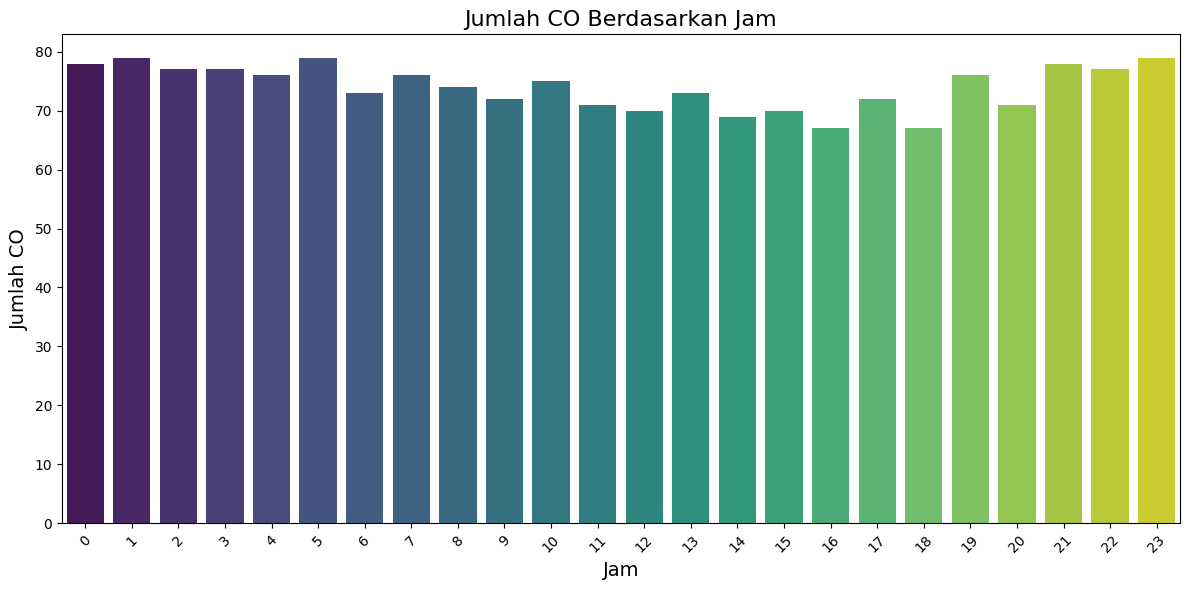

In [45]:
# Asumsi data co_counts_by_day sudah ada
co_counts_by_day = data_air3.groupby(by="hour").CO.nunique()

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x=co_counts_by_day.index, y=co_counts_by_day.values, palette='viridis')
plt.title('Jumlah CO Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah CO', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2:
Bagaimana perbandingan jumlah TEMP antara jam-jam yang berbeda? Apakah ada jam tertentu di mana peningkatan signifikan terjadi dibandingkan dengan jam lainnya?

<ipython-input-46-bae94e012447>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temp_by_hour.index, y=avg_temp_by_hour.values, palette='coolwarm')


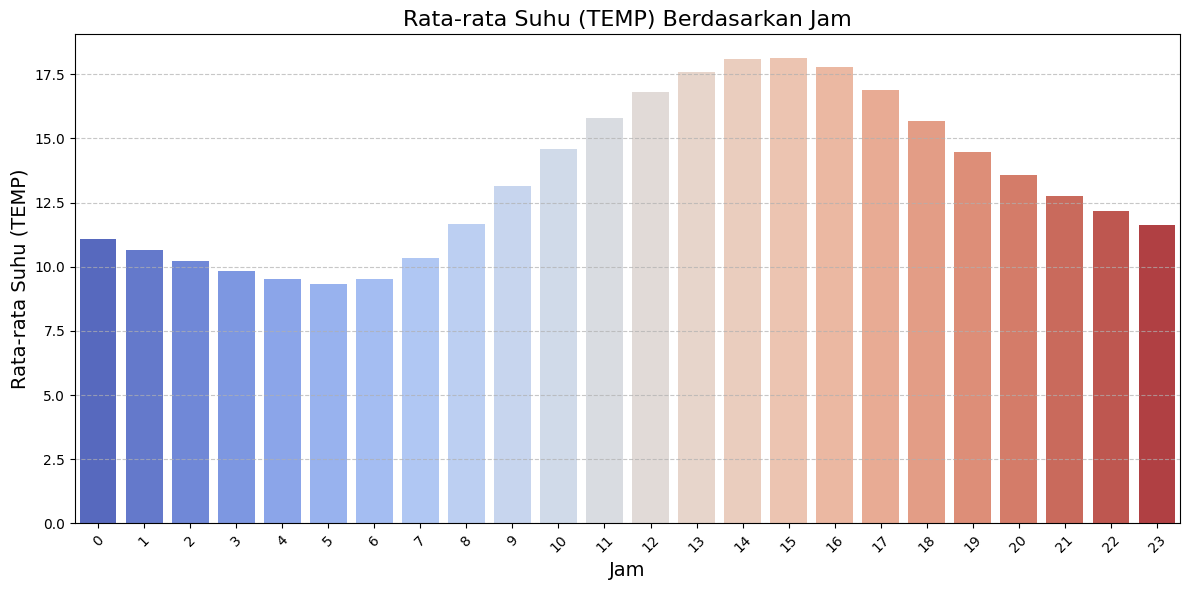

In [46]:
# Asumsi data_air2 sudah ada dan memiliki kolom "hour" dan "TEMP"
# Menghitung rata-rata TEMP berdasarkan jam
avg_temp_by_hour = data_air2.groupby('hour')['TEMP'].mean()

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_temp_by_hour.index, y=avg_temp_by_hour.values, palette='coolwarm')
plt.title('Rata-rata Suhu (TEMP) Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Suhu (TEMP)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
nsight dari Visualisasi Rata-rata Suhu (TEMP) Berdasarkan Jam:
Kenaikan Suhu Siang Hari:

Dari jam 0 hingga jam 12, terlihat adanya peningkatan suhu secara bertahap. Ini menunjukkan bahwa suhu cenderung lebih tinggi di siang hari dibandingkan dengan malam hari.
Puncak Suhu:

Suhu mencapai puncaknya pada jam 15 atau 16. Ini menunjukkan bahwa pada waktu tersebut, paparan sinar matahari dan aktivitas lainnya mungkin berkontribusi pada suhu tertinggi dalam sehari.
Penurunan Suhu Malam Hari:

Setelah jam 16, suhu mulai menurun dengan cukup signifikan hingga jam 23. Penurunan ini mungkin dipengaruhi oleh hilangnya sinar matahari dan penurunan aktivitas.
Rentang Suhu:

Rentang suhu antara jam 0 hingga 6 relatif lebih rendah dibandingkan dengan jam-jam lainnya, menunjukkan bahwa suhu malam cenderung lebih dingin.
Stabilitas Suhu:

Selama jam-jam tertentu, suhu tampak lebih stabil dan tidak banyak berfluktuasi, misalnya antara jam 9 hingga 15. Ini bisa berarti kondisi cuaca yang konsisten selama jam-jam tersebut.

Insight dari Visualisasi Jumlah CO Berdasarkan Jam:
Konsistensi Jumlah CO:

Jumlah CO yang terukur menunjukkan pola yang relatif konsisten sepanjang hari, dengan sedikit variasi antar jam. Ini menunjukkan bahwa emisi CO mungkin stabil dan tidak banyak dipengaruhi oleh waktu dalam sehari.
Puncak CO di Waktu Tertentu:

Terdapat beberapa jam di mana jumlah CO terlihat sedikit lebih tinggi, terutama di jam-jam seperti 0, 1, dan 2. Hal ini bisa terkait dengan aktivitas kendaraan atau industri yang lebih tinggi di malam hari atau dini hari.
Penurunan CO pada Pagi dan Sore:

Dari jam 7 hingga 10, jumlah CO tampak menurun, mungkin mencerminkan penurunan aktivitas kendaraan setelah jam sibuk malam. Namun, jumlah CO kembali meningkat setelah jam 17, menunjukkan kemungkinan peningkatan aktivitas setelah bekerja.
Rata-rata yang Menyokong:

Rentang jumlah CO yang terlihat di visualisasi menunjukkan bahwa emisi CO sepanjang hari berada di level yang cukup stabil, yang bisa menjadi indikasi dari kebijakan pengendalian polusi yang efektif atau praktik industri yang tidak terlalu berisiko.
Pentingnya Pengamatan Lanjutan:

Meskipun tidak ada fluktuasi besar dalam data, penting untuk terus memantau jumlah CO, terutama pada jam-jam dengan angka tinggi, untuk mencegah potensi masalah kesehatan yang terkait dengan polusi udara.

##CONCLUSION:
Analisis terhadap visualisasi suhu (TEMP) dan jumlah CO menunjukkan pola-pola yang signifikan terkait dengan waktu dalam sehari.

Pola Suhu Harian:

Suhu menunjukkan kenaikan yang bertahap dari malam hingga siang, dengan puncak terjadi pada jam 15 atau 16. Hal ini menunjukkan pengaruh sinar matahari dan aktivitas siang hari terhadap suhu. Setelah puncak tersebut, suhu mengalami penurunan yang signifikan pada malam hari, mencerminkan perubahan kondisi lingkungan saat hilangnya sinar matahari. Rentang suhu yang lebih rendah di malam hari dan stabilitas suhu yang terjaga pada jam-jam tertentu (9 hingga 15) menunjukkan konsistensi dalam kondisi cuaca.
Emisi CO yang Stabil:

Jumlah CO menunjukkan konsistensi sepanjang hari dengan sedikit variasi. Terdapat puncak emisi CO di jam-jam dini (0, 1, dan 2) yang dapat terkait dengan aktivitas malam yang lebih tinggi. Penurunan jumlah CO terlihat di pagi hari, dengan lonjakan kembali pada sore hari, yang mencerminkan perubahan aktivitas kendaraan setelah jam sibuk. Rentang jumlah CO yang stabil mengindikasikan kemungkinan efektivitas kebijakan pengendalian polusi.
Rekomendasi Pengamatan Lanjutan:

Meskipun tidak terdapat fluktuasi signifikan, pemantauan terus-menerus terhadap suhu dan jumlah CO sangat penting untuk mengidentifikasi potensi masalah kesehatan terkait dengan kualitas udara. Hal ini juga dapat membantu dalam perumusan kebijakan yang lebih baik dalam pengelolaan lingkungan.

FileNotFoundError: Cannot find file: analisis.py